### Importação dos dados



In [9]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregamento dos dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Ano,Faturamento
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,2021,219.08
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,2022,256.35
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,2021,279.51
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,2022,1009.99
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,2020,446.99


#1. Análise do faturamento


In [11]:
def processa_loja(df, nome_loja):
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)  # <-- Ajuste aqui
    df['Ano'] = df['Data da Compra'].dt.year
    df['Faturamento'] = df['Preço']
    agrupado = df.groupby('Ano')['Faturamento'].sum().reset_index()
    agrupado['Loja'] = nome_loja
    return agrupado

# Processa todas as lojas
faturamento_loja1 = processa_loja(loja1, 'Loja 1')
faturamento_loja2 = processa_loja(loja2, 'Loja 2')
faturamento_loja3 = processa_loja(loja3, 'Loja 3')
faturamento_loja4 = processa_loja(loja4, 'Loja 4')

    Ano  Faturamento    Loja
0  2020    491911.51  Loja 1
1  2021    482829.91  Loja 1
2  2022    422086.24  Loja 1
3  2023    137681.46  Loja 1
    Ano  Faturamento    Loja
0  2020    491911.51  Loja 2
1  2021    482829.91  Loja 2
2  2022    422086.24  Loja 2
3  2023    137681.46  Loja 2
    Ano  Faturamento    Loja
0  2020    491911.51  Loja 3
1  2021    482829.91  Loja 3
2  2022    422086.24  Loja 3
3  2023    137681.46  Loja 3
    Ano  Faturamento    Loja
0  2020    491911.51  Loja 4
1  2021    482829.91  Loja 4
2  2022    422086.24  Loja 4
3  2023    137681.46  Loja 4


In [5]:
# Junta os dados das quatro lojas
faturamento_total = pd.concat([
    faturamento_loja1,
    faturamento_loja2,
    faturamento_loja3,
    faturamento_loja4
])

<function matplotlib.pyplot.show(close=None, block=None)>

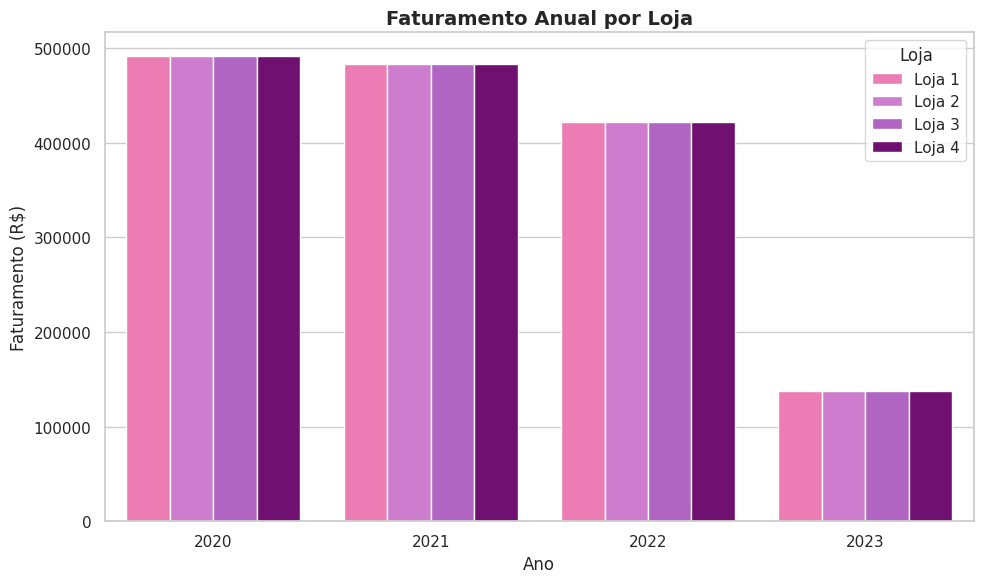

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a paleta de cores de rosa a roxo
cores = ['#FF69B4', '#DB70DB', '#BA55D3', '#800080']  # rosa, lilás, roxo claro, roxo escuro

# Define o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de barras agrupadas
sns.barplot(
    data=faturamento_total,
    x='Ano',
    y='Faturamento',
    hue='Loja',
    palette=cores
)

plt.title('Faturamento Anual por Loja', fontsize=14, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Loja')
plt.tight_layout()
plt.show


# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
